In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

In [48]:
df= pd.read_csv(r'/Users/jonathanflores/Documents/Flatiron/Gitted_project/zippedData/tmdb.movies.csv')
df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [49]:
#a dictionary was created from the website 
genre_dict = \
{'Action'        :  28,
'Adventure'     :  12 ,
'Animation'     :  16,
'Comedy'         : 35,
'Crime'          : 80,
'Documentary'    : 99,
'Drama'          : 18,
'Family'         : 10751,
'Fantasy'        : 14,
'History'        : 36,
'Horror'         : 27,
'Music'          : 10402,
'Mystery'        : 9648,
'Romance'        : 10749,
'Science Fiction' : 878,
'TV Movie'      : 10770,
'Thriller'       : 53,
'War'            : 10752,
'Western'        : 37}

In [50]:
genre_dict = {v:k for k,v in genre_dict.items()}

In [51]:
genre_dict

{28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western'}

In [52]:
df['genre_ids'] =df['genre_ids'].apply(lambda x: x.replace('[', ''))
df['genre_ids'] =df['genre_ids'].apply(lambda x: x.replace(']', ''))

In [53]:
df['genre_ids'] = df['genre_ids'].apply(lambda x: x.split(','))

In [54]:
df['genre_ids']

0             [12,  14,  10751]
1        [14,  12,  16,  10751]
2               [12,  28,  878]
3             [16,  35,  10751]
4               [28,  878,  12]
                  ...          
26512                 [27,  18]
26513                 [18,  53]
26514            [14,  28,  12]
26515         [10751,  12,  28]
26516                 [53,  27]
Name: genre_ids, Length: 26517, dtype: object

In [55]:
df['genre_ids'] = df['genre_ids'].apply(lambda x: [i for i in x if i])

In [56]:
df['genre_ids'] = df['genre_ids'].apply(lambda x: [int(i) for i in x])

In [57]:
df['genre_ids'].apply(lambda x: [genre_dict[i] for i in x])

0                   [Adventure, Fantasy, Family]
1        [Fantasy, Adventure, Animation, Family]
2           [Adventure, Action, Science Fiction]
3                    [Animation, Comedy, Family]
4           [Action, Science Fiction, Adventure]
                          ...                   
26512                            [Horror, Drama]
26513                          [Drama, Thriller]
26514               [Fantasy, Action, Adventure]
26515                [Family, Adventure, Action]
26516                         [Thriller, Horror]
Name: genre_ids, Length: 26517, dtype: object

In [12]:
df['genres']= df['genre_ids'].apply(lambda x: [genre_dict[i] for i in x])
df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genres
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"[Adventure, Fantasy, Family]"
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"[Fantasy, Adventure, Animation, Family]"
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"[Adventure, Action, Science Fiction]"
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"[Animation, Comedy, Family]"
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"[Action, Science Fiction, Adventure]"
...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,"[Horror, Drama]"
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,"[Drama, Thriller]"
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,"[Fantasy, Action, Adventure]"
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,"[Family, Adventure, Action]"


In [13]:
officialtable = df.drop(['Unnamed: 0', 'genre_ids', 'id','original_language','release_date','vote_count',], axis=1)
officialtable

,original_title,popularity,title,vote_average,genres
0,Harry Potter and the Deathly Hallows: Part 1,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,"[Adventure, Fantasy, Family]"
1,How to Train Your Dragon,28.734,How to Train Your Dragon,7.7,"[Fantasy, Adventure, Animation, Family]"
2,Iron Man 2,28.515,Iron Man 2,6.8,"[Adventure, Action, Science Fiction]"
3,Toy Story,28.005,Toy Story,7.9,"[Animation, Comedy, Family]"
4,Inception,27.920,Inception,8.3,"[Action, Science Fiction, Adventure]"
...,...,...,...,...,...
26512,Laboratory Conditions,0.600,Laboratory Conditions,0.0,"[Horror, Drama]"
26513,_EXHIBIT_84xxx_,0.600,_EXHIBIT_84xxx_,0.0,"[Drama, Thriller]"
26514,The Last One,0.600,The Last One,0.0,"[Fantasy, Action, Adventure]"
26515,Trailer Made,0.600,Trailer Made,0.0,"[Family, Adventure, Action]"


In [14]:
officialtable2 = officialtable[officialtable['vote_average'] >=9]
officialtable2

,original_title,popularity,title,vote_average,genres
770,Full Love,2.288,Full Love,10.0,"[Action, Crime, Drama, Thriller]"
1060,"June 17th, 1994",1.406,"June 17th, 1994",9.0,[Documentary]
1063,Bright Falls,1.400,Bright Falls,9.0,"[Mystery, Thriller]"
1154,A Cloudy Lesson,1.374,A Cloudy Lesson,10.0,[Animation]
1230,All That Glitters,1.241,All That Glitters,10.0,[]
...,...,...,...,...,...
26281,Nas: Live from the Kennedy Center,0.600,Nas: Live from the Kennedy Center,9.0,[Music]
26282,Flower Boy: A Conversation,0.600,Flower Boy: A Conversation,9.0,[Documentary]
26283,Bellator 192: Lima Vs. Macdonald,0.600,Bellator 192: Lima Vs. Macdonald,9.0,[]
26284,Hotel Coolgardie,0.600,Hotel Coolgardie,9.0,"[Comedy, Documentary, Drama, Horror]"


In [15]:
officialtable2.explode('genres')

,original_title,popularity,title,vote_average,genres
770,Full Love,2.288,Full Love,10.0,Action
770,Full Love,2.288,Full Love,10.0,Crime
770,Full Love,2.288,Full Love,10.0,Drama
770,Full Love,2.288,Full Love,10.0,Thriller
1060,"June 17th, 1994",1.406,"June 17th, 1994",9.0,Documentary
...,...,...,...,...,...
26284,Hotel Coolgardie,0.600,Hotel Coolgardie,9.0,Documentary
26284,Hotel Coolgardie,0.600,Hotel Coolgardie,9.0,Drama
26284,Hotel Coolgardie,0.600,Hotel Coolgardie,9.0,Horror
26285,El ángel en el reloj,0.600,Angel On The Clock,9.0,Animation


In [16]:
officialtable2.drop(['original_title', 'popularity'], axis=1)

,title,vote_average,genres
770,Full Love,10.0,"[Action, Crime, Drama, Thriller]"
1060,"June 17th, 1994",9.0,[Documentary]
1063,Bright Falls,9.0,"[Mystery, Thriller]"
1154,A Cloudy Lesson,10.0,[Animation]
1230,All That Glitters,10.0,[]
...,...,...,...
26281,Nas: Live from the Kennedy Center,9.0,[Music]
26282,Flower Boy: A Conversation,9.0,[Documentary]
26283,Bellator 192: Lima Vs. Macdonald,9.0,[]
26284,Hotel Coolgardie,9.0,"[Comedy, Documentary, Drama, Horror]"


In [17]:
officialtable3=officialtable2.explode('genres')
officialtable3


,original_title,popularity,title,vote_average,genres
770,Full Love,2.288,Full Love,10.0,Action
770,Full Love,2.288,Full Love,10.0,Crime
770,Full Love,2.288,Full Love,10.0,Drama
770,Full Love,2.288,Full Love,10.0,Thriller
1060,"June 17th, 1994",1.406,"June 17th, 1994",9.0,Documentary
...,...,...,...,...,...
26284,Hotel Coolgardie,0.600,Hotel Coolgardie,9.0,Documentary
26284,Hotel Coolgardie,0.600,Hotel Coolgardie,9.0,Drama
26284,Hotel Coolgardie,0.600,Hotel Coolgardie,9.0,Horror
26285,El ángel en el reloj,0.600,Angel On The Clock,9.0,Animation


In [18]:
officialtable5 = officialtable3.drop(['original_title', 'popularity'], axis=1).groupby(['genres', 'vote_average']).count()
officialtable5

title
genres    vote_average       
Action    9.0              19
          9.5               1
          10.0             65
Adventure 9.0              21
          9.3               1
...                       ...
War       10.0              5
Western   9.0               3
          9.3               1
          9.7               1
          10.0             24

[87 rows x 1 columns]

In [19]:
officialtable6 = officialtable5.pivot_table(index='genres', columns='vote_average', values='title', aggfunc='sum', fill_value=0)
officialtable6

vote_average,9.0,9.1,9.2,9.3,9.4,9.5,9.7,9.8,10.0
genres,,,,,,,,,
Action,19,0,0,0,0,1,0,0,65
Adventure,21,0,0,1,0,0,0,0,39
Animation,29,0,0,1,0,2,0,1,49
Comedy,54,1,3,5,1,7,0,0,200
Crime,10,0,0,0,0,0,0,1,43
Documentary,139,0,3,16,0,14,1,1,371
Drama,84,0,2,8,1,11,0,8,287
Family,11,0,1,0,0,1,0,1,39
Fantasy,19,0,0,1,0,0,0,1,27


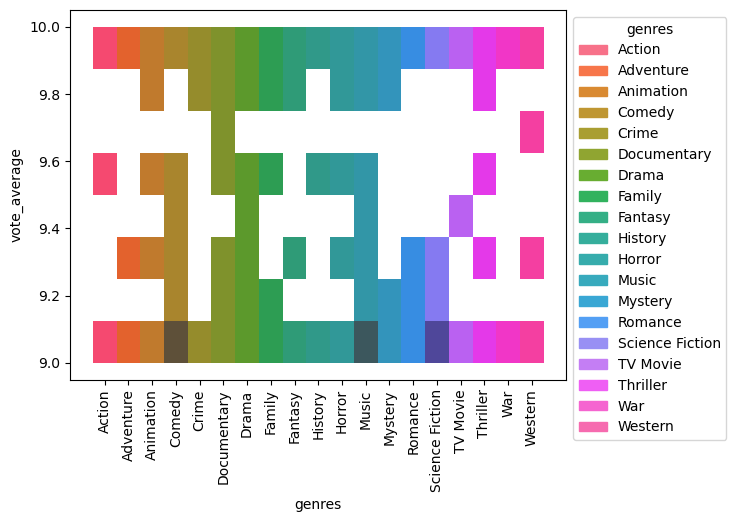

In [165]:
ax = sns.histplot(x = 'genres', y = 'vote_average',hue='genres',  bins = 8,data = officialtable5)
ax.tick_params(axis='x', labelrotation = 90)
sns.color_palette("bright", 10000)
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1))
plt.show()

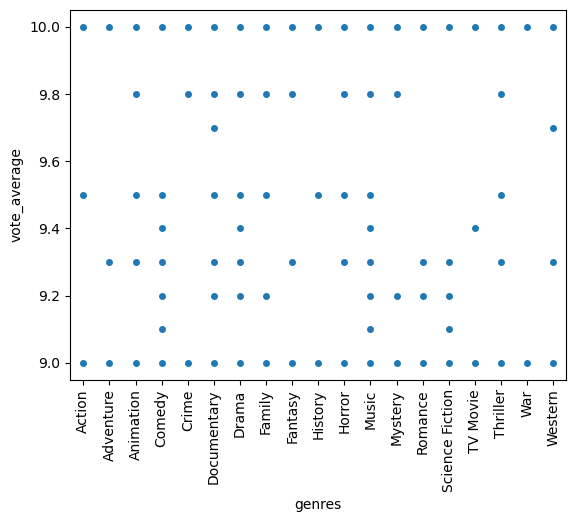

In [167]:
#get this into a box plot asap must be done before 12pm
ax=sns.swarmplot(x = 'genres', y = 'vote_average', data = officialtable5)
ax.tick_params(axis='x', labelrotation = 90)

plt.show()

In [170]:
officialtable6 = officialtable5.reset_index()

In [171]:
officialtable6

,genres,vote_average,title
0,Action,9.0,19
1,Action,9.5,1
2,Action,10.0,65
3,Adventure,9.0,21
4,Adventure,9.3,1
...,...,...,...
82,War,10.0,5
83,Western,9.0,3
84,Western,9.3,1
85,Western,9.7,1


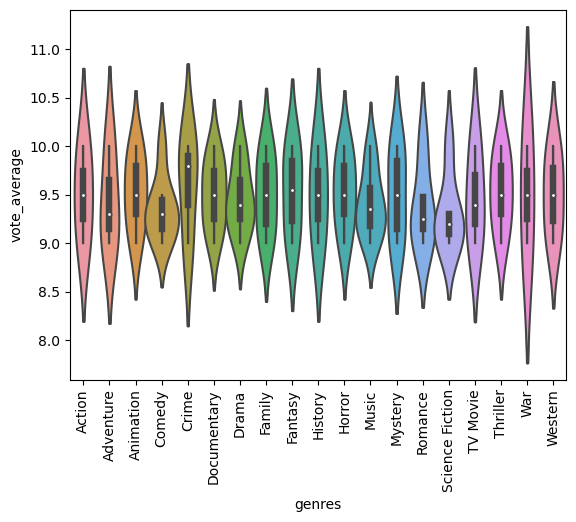

In [224]:
ax = sns.violinplot(x = 'genres', y = 'vote_average',data = officialtable6)
ax.tick_params(axis='x', labelrotation = 90)

sns.violinplot(x=officialtable6["genres"], y=officialtable6["vote_average"], linewidth=1)
sns.violinplot(x=officialtable6["genres"], y=officialtable6["vote_average"], width=1.3)

plt.show()

In [ ]:
officialtable6.to